# Introduction 
### In this project, we will examine the data and build different machine learning models that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.


# Dataset
### The dataset used in this project is mushrooms.csv that contains 8124 instances of mushrooms with 23 features like cap- shape, cap-surface, cap-color, bruises, odor, etc.
.

In [55]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [19]:
#read the csv file of the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')

In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
#select top 5 rows of a dataframe using .head()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

here we observed that data types are objective and non-null values

In [7]:
#Checking if have some null values for Clean the data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

here we observed that dtype is integer and no missing values

In [8]:
#Checking how many rows and columns we have.
df.shape


(8124, 23)

here we have 8124 rows and 23 columns

In [9]:
#how many Edible, Poisonous we have in the data set.
df['class'].value_counts()


e    4208
p    3916
Name: class, dtype: int64

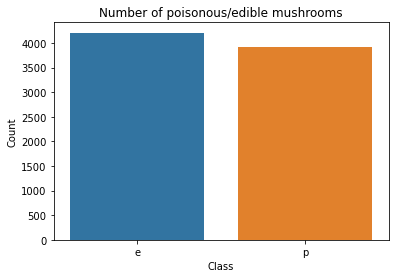

In [16]:
#Now let’s visualize the count of edible and poisonous mushrooms using Seaborncount = df["class"].value_counts()
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title("Number of poisonous/edible mushrooms")
sns.barplot(count.index, count.values)
plt.show()

here we observed that the datsset is balanced

In [20]:
##Data manupilation
##The data is categorical so we’ll use LabelEncoder to convert it to ordinal.
#LabelEncoder converts each value in a column to a number using with for loop
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


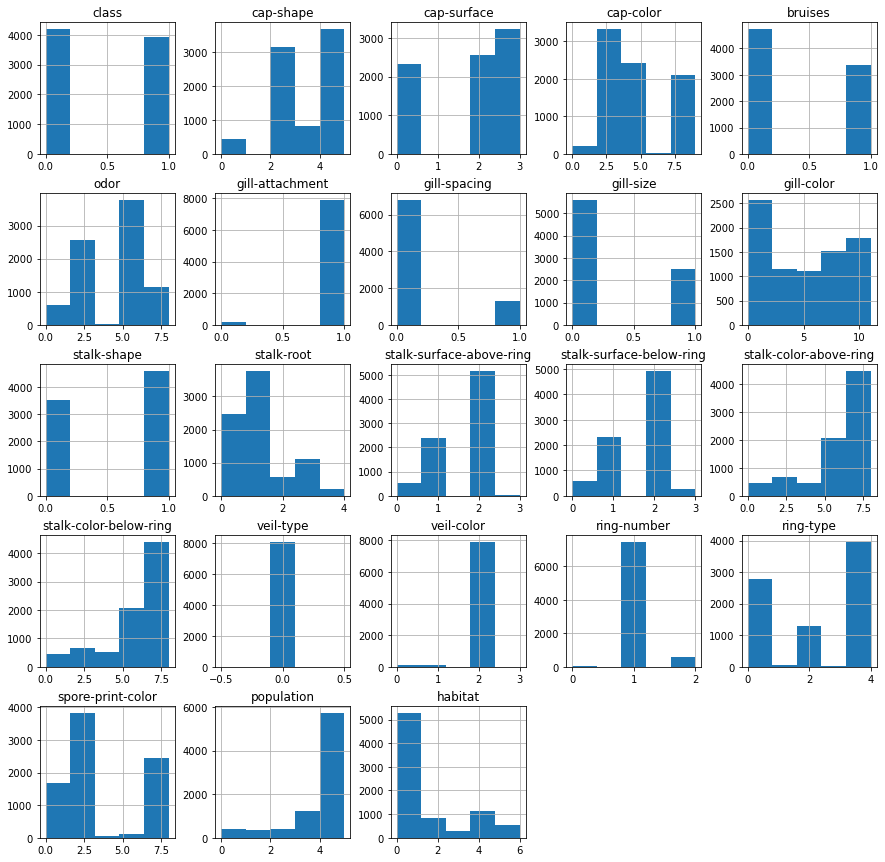

In [23]:
df.hist(bins=5, figsize=(15,15));

In [24]:
#Easy to see that veil-type is useless because there are no data we needs.
del df['veil-type']


In [25]:
#Split the data to y and x with x is without the class's.
y = df['class']
X = df.drop('class', axis=1)

In [28]:
#Look at the Data Head affter deleting the veil-type and drop the class's.
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [39]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [40]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [41]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


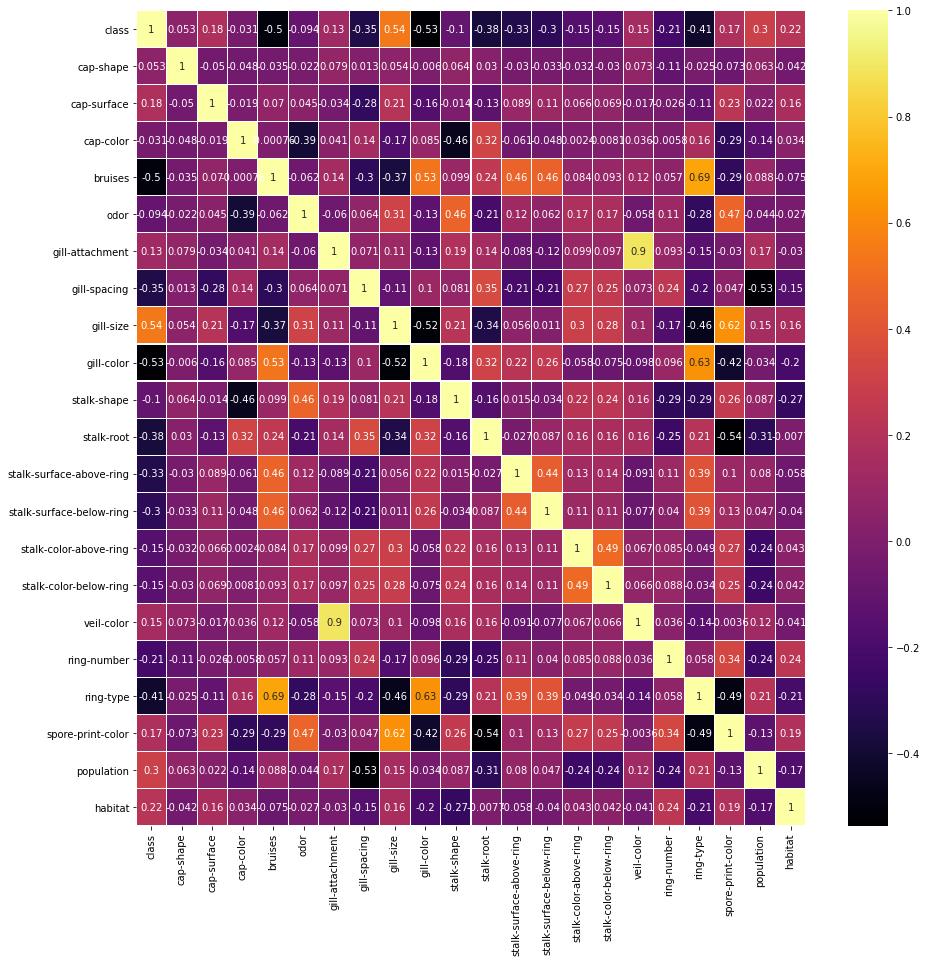

In [42]:
#Heatmap of all features.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,cmap="inferno", annot=True);

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [45]:
#check the shape of train test split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6499, 21), (1625, 21), (6499,), (1625,))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [48]:
#Train result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_test, y_test)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3388
           1       1.00      1.00      1.00      3111

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

[[3388    0]
 [   0 3111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[819   1]
 [  2 803]]


In [49]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3388
           1       1.00      1.00      1.00      3111

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

[[3388    0]
 [   0 3111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  0 805]]


In [50]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))

#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3388
           1       1.00      1.00      1.00      3111

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

[[3388    0]
 [   0 3111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  0 805]]


In [52]:
#train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3388
           1       0.95      0.95      0.95      3111

    accuracy                           0.95      6499
   macro avg       0.95      0.95      0.95      6499
weighted avg       0.95      0.95      0.95      6499

[[3245  143]
 [ 162 2949]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       820
           1       0.96      0.95      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

[[787  33]
 [ 44 761]]


In [56]:
print(cross_val_score(KNN,x,y,cv=5).mean())

0.8797053429329292


In [57]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8984187192118226


In [58]:
print(cross_val_score(DecisionTree,x,y,cv=5).mean())

0.9601133762788935


In [59]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8301065555134521


In [60]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [62]:
model = DecisionTreeClassifier(random_state=12)
params = dict(
    criterion = ["gini","entropy"],
    max_depth = np.arange(1,11),
    max_features = [None, "auto", "sqrt", "log2"]
)
clf = GridSearchCV(model, params, n_jobs=-1, cv = 5)

In [65]:
clf.fit(x_train, y_train)
print("Best Parameters for Decision Tree Classifier:\n{}".format(clf.best_params_))

Best Parameters for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None}


In [70]:
final_model = DecisionTreeClassifier(max_depth= 5, max_features= None,random_state=12)
final_model.fit(x_train, y_train)
print("Test Accuracy Score : {:.4f}".format(final_model.score(x_test,y_test)))

Test Accuracy Score : 0.9803


# conclusion

#### Most of the classification methods hit above 80% accuracy with this dataset and DecisionTreeClassifier is the best accuracy model after cross check with hyperparameter in this problem statement and good to eat this mushrooms happily'.

In [71]:
import joblib
joblib.dump(clf,'mushroom dataset model.pkl')

['mushroom dataset model.pkl']

In [72]:
mod=joblib.load('mushroom dataset model.pkl')
print(mod.predict(x_test))

[0 1 1 ... 1 0 0]
